# Figure notebook

Unreported boards (BibTex key, board, reason to not report)

- martinsRealtimeSVMbasedHardware2024, Cyclone V, "embedded system with an ARM Cortex-A9 integrated with Cyclone V SoC" + they get worse performance
- rapuanoFPGAbasedHardwareAccelerator2021a, Kintex US rad-hard (XQRKU060), don't report total power + half the frequency and double the latency + They use ZU7EV as a development board
- heConfigurable2D3D2023a, Zynq 7000 (Z7020) {Zedboard}, only ran HybridSN on it + lower-cost and less resources
- gargAircraftDetectionSatellite2024, Kintex Ultrascale(KU040), 0 details about it, just report lower FPS than the Zynq US+
- sabogalMethodologyEvaluatingAnalyzing2021a, Zynq Z7020, experiment same than their Zynq US+, no more details


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from fpga_part_info import *
from pathlib import Path
import pandas as pd

# Quick ANSI color code shortcuts
r = "\033[31m"
y = "\033[33m"
g = "\033[32m"
b = "\033[34m"
e = "\033[0m"

pickleName = "all_datapoints.pkl"
datapointsDfPath = "../../data/Review_Ml-RS-FPGA/Dataframes/" + pickleName
datapointsDf = pd.read_pickle(datapointsDfPath)

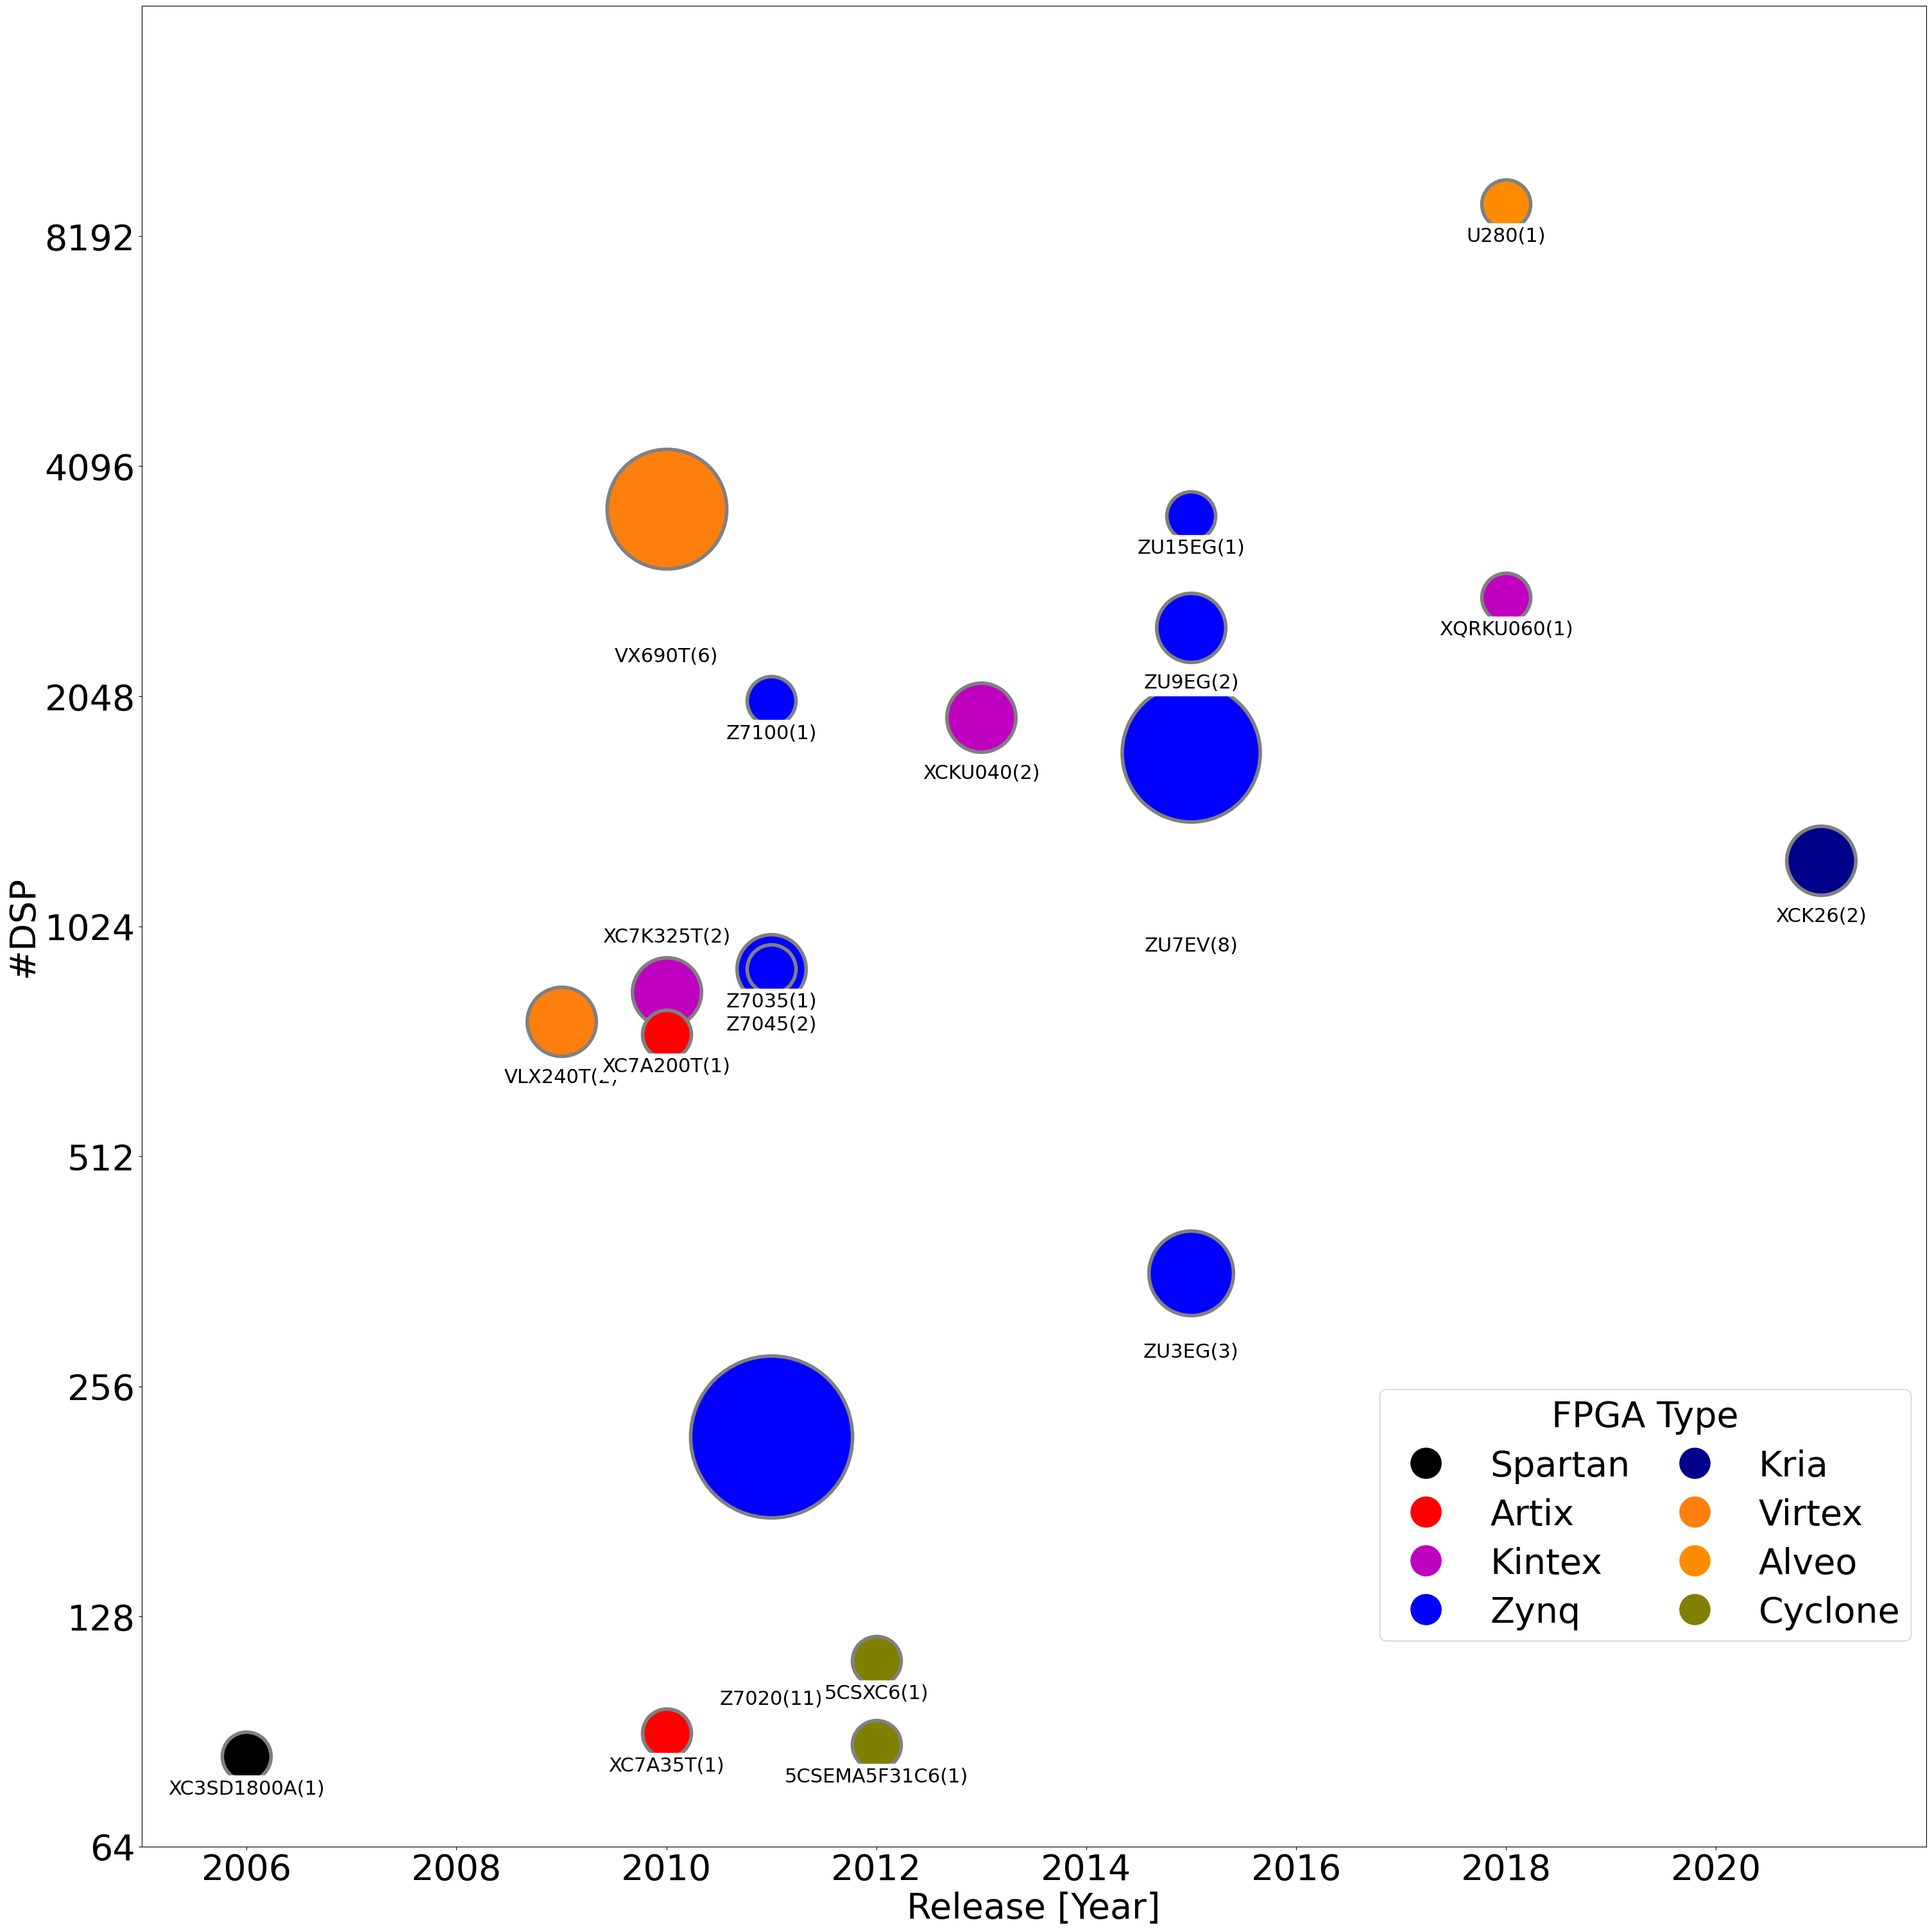

In [ ]:
# ----- Manually add the unreported FPGAs, available through the Tag "Other: (Unreported board): <family/serie>") -----
# Cyclone 5, Kintex US rad hard , Zynq 7000, Kintex US (KU040) , Z-7
unreportedFPGAS = ["5CSEMA5F31C6", "XQRKU060" , "Z7020","XCKU040","Z7020"]

def get_part(board_str):
    tag =  board_str.split("(")[0]
    board = board_str.split("{")[1].split("}")[0]
    part = board_str.split("(")[1].split(")")[0]
    if(board.endswith("KV260")):
        part = "XCK26"
    return part,board

# ----- Build a dictionary with the parts and their quantities -----
def add_part(parts,p):
    if(p in parts.keys()):
            parts[p]["quantity"] += 1
    else:
        parts[p] = {}
        parts[p]["quantity"] = 1
        parts[p]["year"]    = fpga_part_info[p][0]
        parts[p]["DSP"]     = fpga_part_info[p][1]
        parts[p]["family"]  = fpga_part_info[p][2]

parts_info = {}
# For all article (i.e., unique experiment)
for k in datapointsDf["BBT Citation Key"].unique():
    df = datapointsDf[datapointsDf["BBT Citation Key"] == k]
    for board in df["Board"].unique():
        p, b = get_part(board)
        add_part(parts_info, p)
# And for the unreported FPGAs
for p in unreportedFPGAS:
    add_part(parts_info, p)
parts_info = {k: v for k, v in sorted(parts_info.items(), key=lambda item: item[1]["quantity"],reverse=True)}

# ----- Prepare the plot -----
plt.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(1, 1, layout="constrained")
fcolors = {
        "Spartan":  "k",
        "Artix":    "r",
        "Kintex":   "m",
        "Zynq":     "b",
        "Kria":     "darkblue",
        "Virtex":   "tab:orange",
        "Alveo":    "darkorange",
        "Cyclone":  "olive"
        }

for k,v in parts_info.items():
    x = v["year"]
    y = np.log2(v["DSP"])
    r = v["quantity"]
    lab = k + "(" + str(v["quantity"]) + ")"
    # Plot the circle
    ax.scatter(x, y, r*3000, ec="gray", lw=4, c=fcolors[v["family"]])
    # Plot the label
    if k == "XC7K325T":
        ax.annotate(
            lab,
            xy=(x, y),
            xytext=(x, y + r/10),  # small offset above
            fontsize=22,
            ha="center",
            va="bottom",           # text above its reference point
            backgroundcolor="w"
        )
    else:
        ax.annotate(
            lab,
            xy=(x, y),
            xytext=(x, y - 0.1*r),  # small offset below
            fontsize=22,
            ha="center",
            va="top",           # text above its reference point
            backgroundcolor="w"
        )

# Add the legend
handles = []
for k,v in fcolors.items():
    handles.append(plt.Line2D([0], [0], color=v, linewidth=0, linestyle='-',label=k, marker="o", markersize=34))
fig.legend(title="FPGA Type",handles=handles,loc='lower right',ncols=2,framealpha=1,bbox_to_anchor=(1.0,0.14),
    labelspacing=0.4,borderpad=0.3,handleheight=0.8,columnspacing=0.8)

# Set the axes
yt = [str(2**f) for f in range(6, 14)]
ax.set_yticks(range(6, 14), yt)
ax.set_ylim(6, 14)
ax.set_ylabel("#DSP")
xt = np.arange(2006, 2022, 2)
ax.set_xticks(xt, xt)
ax.set_xlim(2005, 2022)
ax.set_xlabel("Release [Year]")

plt.rcParams['figure.figsize'] = [30, 30]
plt.show()
